<a href="https://colab.research.google.com/github/Benji-Wagner/Heart-Disease-UCI/blob/master/Heart_Disease_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Benji Wagner

This dataset titled 'Heart-Disease-UCI' is taken from Kaggle and can be found here:
https://www.kaggle.com/ronitf/heart-disease-uci

This Heart-Disease-UCI dataset seems relatively simple. I hope I can use this dataset as practice for some visualizations and evaluating a simple machine learning model.

First, we need to import all the needed libraries

In [0]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix


Now let's read in the data:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
heart_data = pd.read_csv("/content/gdrive/My Drive/Repos/Heart-Disease-UCI/data/heart.csv")

In [15]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's change these column names to be more clear:

In [0]:
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Before we continue further, let's see what the variable descriptions are, taken from Kaggle:

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Let's change some of these values to help improve interpretability later on:

In [17]:
heart_data['sex'][heart_data['sex'] == 0] = 'female'
heart_data['sex'][heart_data['sex'] == 1] = 'male'

heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 1] = 'typical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 2] = 'atypical angina'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 3] = 'non-anginal pain'
heart_data['chest_pain_type'][heart_data['chest_pain_type'] == 4] = 'asymptomatic'

heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_data['fasting_blood_sugar'][heart_data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_data['rest_ecg'][heart_data['rest_ecg'] == 0] = 'normal'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_data['rest_ecg'][heart_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 0] = 'no'
heart_data['exercise_induced_angina'][heart_data['exercise_induced_angina'] == 1] = 'yes'

heart_data['st_slope'][heart_data['st_slope'] == 1] = 'upsloping'
heart_data['st_slope'][heart_data['st_slope'] == 2] = 'flat'
heart_data['st_slope'][heart_data['st_slope'] == 3] = 'downsloping'

heart_data['thalassemia'][heart_data['thalassemia'] == 1] = 'normal'
heart_data['thalassemia'][heart_data['thalassemia'] == 2] = 'fixed defect'
heart_data['thalassemia'][heart_data['thalassemia'] == 3] = 'reversable defect'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykerne

Let's take a look at the datatypes

In [18]:
heart_data.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Some of these are categorical variables. Let's adjust them accordingly.    
    

In [0]:
heart_data['sex'] = heart_data['sex'].astype('category')
heart_data['chest_pain_type'] = heart_data['chest_pain_type'].astype('category')
heart_data['fasting_blood_sugar'] = heart_data['fasting_blood_sugar'].astype('category')
heart_data['rest_ecg'] = heart_data['rest_ecg'].astype('category')
heart_data['exercise_induced_angina'] = heart_data['exercise_induced_angina'].astype('category')
heart_data['st_slope'] = heart_data['st_slope'].astype('category')
heart_data['thalassemia'] = heart_data['thalassemia'].astype('category')

I found an interesting tool to expedite EDA. `pandas_profiling` creates a summary report for all the variables in a dataframe depending on its data type. Also, peep the random sample at the bottom!

In [21]:
pandas_profiling.ProfileReport(heart_data)

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,19.6 KiB
Average record size in memory,66.2 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


If we want to fit these categorical variables into our model, we need to get dummy variables.

In [0]:
heart_data = pd.get_dummies(heart_data, drop_first = True)

In [0]:
labels = heart_data['target']
features = heart_data.drop(labels = ['target'], axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 2019, stratify = labels)

Let's compare how a RandomForest compares to Lasso Logistic Regression

## Model FItting

In [0]:
rf = RandomForestClassifier(n_estimators=200, random_state=2019)
lasso = LogisticRegressionCV(cv = 10, penalty = 'l1', solver = 'liblinear', random_state=2019)

In [49]:
rf.fit(X_train, y_train)
lasso.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=2019, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [0]:
rf_predictions = rf.predict(X_test)
rf_probabilities = rf.predict_proba(X_test)
lasso_predictions = lasso.predict(X_test)
lasso_probabilities = lasso.predict_proba(X_test)
# Note: For the probabilities, the first column = probability of non-event
# and the second column = probability of event

In [61]:
print("Random Forest Accuracy: {:.1%}".format(rf.score(X_test, y_test)) + 
      "\nLasso Logistic Regression Accuracy: {:.1%}".format(lasso.score(X_test, y_test)))

Random Forest Accuracy: 83.6%
Lasso Logistic Regression Accuracy: 83.6%


Wow, they both performed equally well! Let's look at some ROC Curves:

In [0]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities[:,1])
lasso_fpr, lasso_tpr, _ = roc_curve(y_test, lasso_probabilities[:,1])

In [0]:
rf_auc = roc_auc_score(y_test, rf_probabilities[:,1])
lasso_auc = roc_auc_score(y_test, lasso_probabilities[:,1])

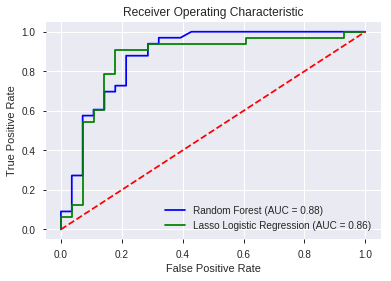

In [91]:
fig = plt.figure();
plt.title('Receiver Operating Characteristic');
plt.plot(rf_fpr, rf_tpr, 'b', label = 'Random Forest (AUC = %0.2f)' % rf_auc);
plt.plot(lasso_fpr, lasso_tpr, 'g', label = 'Lasso Logistic Regression (AUC = %0.2f)' % lasso_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
fig.show();

In [98]:
print("Random Forest Confusion Matrix")
confusion_matrix(y_test, rf_predictions)

Random Forest Confusion Matrix


array([[22,  6],
       [ 4, 29]])

In [99]:
print("Lasso Logistic Regression Confusion Matrix")
confusion_matrix(y_test, lasso_predictions)

Lasso Logistic Regression Confusion Matrix


array([[23,  5],
       [ 5, 28]])

The results are fairly comparable between the two models. Both models correctly classified 51 of the 61 patients. However, Random Forest had one more false positive than Lasso Logistic Regression, whereas Lasso Logistic Regression had one more false negative than Random Forest.